<a href="https://colab.research.google.com/github/ccaballeroh/InferenciaCausal_A22/blob/main/code/assignments/Causal_Inference_A22_Ex01_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On this cell write your name, program (ESCOM, MCC, MCIC, DCC) and in which semester you are on.

- Name:
- Program:
- Semester:

# Analysis of Salaries Between Men and Women

Let's assume we work as data scientists in a company and we're given a data set with the salaries of company employees.

With this data set, we're asked to answer 

**What is the pay gap between men and women in the company?**

## Set up

Import the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Definition of auxiliary functions.

In [2]:
def generate_data(**kwargs):
  seed, N = kwargs["seed"], kwargs["N"]
  np.random.seed(kwargs["seed"])
  sex = np.random.binomial(n=1, p=0.5, size=N)  # 0=Female, 1=Male
  position = ( (sex*np.random.binomial(n=1, p=0.4, size=N) +
              (1-sex)*np.random.binomial(n=1, p=0.1, size=N)) > 0 ).astype(int) 
  salary = (1-sex)*np.random.normal(1000, 500, size=N) +\
          position*np.random.normal(15_000, 3_000, size=N) +\
          np.random.normal(30_000, 5_000, size=N)
  data = pd.DataFrame({
      "sex":sex,
      "position":position,
      "salary":salary
  })
  data.sex = np.where(data.sexo > 0, "Man", "Woman")
  data.position = np.where(data.puesto > 0, "Manager", "No manager")
  return (data
          .assign(salary=lambda x: x.salary.map(lambda y: '%.2f' % y))
  )

def read_data(**kwargs):
  csv_filename = kwargs["csv_filename"]
  return pd.read_csv(csv_filename)

Variable `ENV` must have the value `"HW"` when in homework mode.

In [3]:
ENV = "HW"

In [4]:
get_data = read_data if ENV == "HW" else generate_data

## Start

Read the data from the file named `ex_01_salaries.csv` with the function `read_data` defined above.

In [5]:
kwargs = {
    "csv_filename": "https://raw.githubusercontent.com/ccaballeroh/Causalidad_B22/main/data/ex_01_salaries.csv"
}

data = get_data(**kwargs)

if not ENV == "HW":
  data.to_csv("ex_01_salaries.csv", header=True, index=False)

## Exploratory Data Analysis (EDA)

Let's see the first lines of the data set saved in the DataFrame named `data`.

In [6]:
# Call the method `head()` of the DataFrame
data.head()

,sex,position,salary
0,Man,No manager,24092.77
1,Woman,No manager,25574.01
2,Man,Manager,39051.93
3,Woman,No manager,26058.23
4,Man,Manager,44688.83


Print the data type of the columns of `data`.

In [7]:
# Call the `dtypes` attribute of the DataFrame
data.dtypes

sex          object
position     object
salary      float64
dtype: object

Print the summary of the data set.

In [8]:
# Call the method `describe()` with the parameter include equal to ['object', 'float', 'int']
data.describe(include=['object', 'float', 'int'])

,sex,position,salary
count,200,200,200.000000
unique,2,2,NaN
top,Woman,No manager,NaN
freq,105,146,NaN
mean,NaN,NaN,35155.417850
std,NaN,NaN,8506.795381
min,NaN,NaN,17037.450000
25%,NaN,NaN,28699.515000
50%,NaN,NaN,33567.270000
75%,NaN,NaN,40003.410000


Make a box plot of `salary` by `sex`.

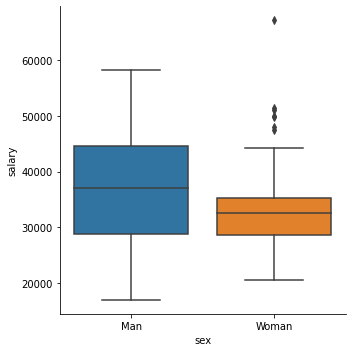

In [9]:
# Use `catplot` of Seaborn
sns.catplot(x="sex", y="salary", kind="box", data=data)

**Question:**

What do you think? Is there or is there not a pay gap between men and women?

**Your answer:**

Now, make a box plot of `salary` by `sex` stratifying by the third variable `position`.

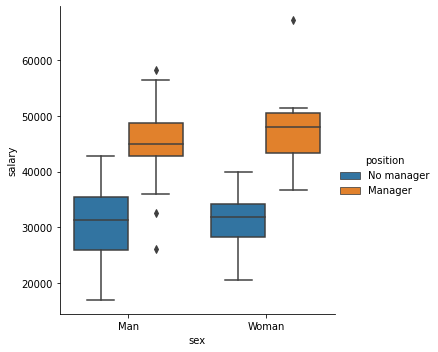

In [10]:
# Use `catplot`
sns.catplot(x="sex", y="salary", hue="position", kind="box", data=data)

**Question:**

Did you change your mind? Is there a difference between men and women when we compare by the same type of position?

**Your answer:**

Now, make a categorical plot of type `swarm` using `catplot` from Seaborn. On the x-axis place the `position`; on the y-axis, `salary`, and stratify by `sex`.

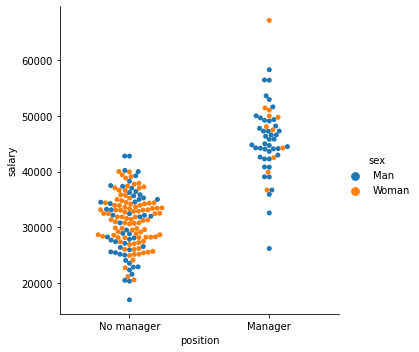

In [11]:
# Your code
sns.catplot(x="position", y="salary", hue="sex", kind="swarm", data=data)

**Question:**

Is the pay gap between managers and no managers big?

**Your answer:**

Now, make the same plot, but swap the variables for the x and the hue.

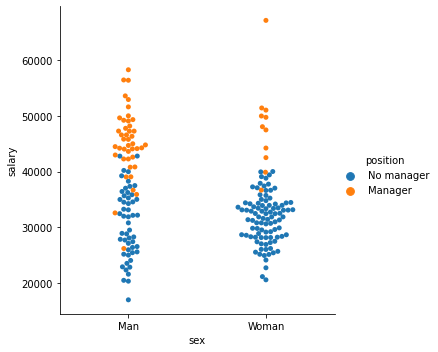

In [12]:
# Your code
sns.catplot(x="sex", y="salary", hue="position", kind="swarm", data=data)

**Question:**

Are there more or fewer women than men in high-paying jobs? And in low-paying jobs?

**Your answer:**

Make a contingency table for mean salary and another for the total number of people in each combination of categories.

In [13]:
# Use `crosstab` from Pandas with the aggregate function `mean` from Numpy
pd.crosstab(data.position, data.sex, data.salary, aggfunc=np.mean)

sex,Man,Woman
position,,
Manager,45342.802791,48006.103636
No manager,30692.537885,31460.254681


In [14]:
# Use `crosstab` from Pandas. Pass the value `True` to the `margins` parameter
pd.crosstab(data.position, data.sex, margins=True)

sex,Man,Woman,All
position,,,
Manager,43,11,54
No manager,52,94,146
All,95,105,200


## Question for Reflection

For this data set, we were asked to determine the pay gap between men and women in the company where the data were collected.

- Before going forward, use the contingency tables above and try to answer the original question: what is the pay gap?

**Your answer:**

## Guided Analysis

### 1. Compute the mean salary for women and for men

- Compute the mean salary for women
- Compute the mean salary for men
- Take the difference

Who earns more? Men or women?

**Your answer:**

In [15]:
## your code

mean_women = np.mean(data.loc[data.sex=="Woman", "salary"])
mean_men = np.mean(data.loc[data.sex=="Man", "salary"])

##

print(f"""
Women earn in average: ${mean_women:,.2f}
Men earn in average: ${mean_men:,.2f}

The difference is ${mean_women - mean_men:,.2f}
""")


Women earn in average: $33,193.63
Men earn in average: $37,323.71

The difference is $-4,130.08



### 2. Now compare by strata

- Compare by the category `position` separately.

- Now, what is the pay gap in each category?

- Who earns more in each position?

**Your answer:**

In [16]:
data.head()

,sex,position,salary
0,Man,No manager,24092.77
1,Woman,No manager,25574.01
2,Man,Manager,39051.93
3,Woman,No manager,26058.23
4,Man,Manager,44688.83


In [17]:
## Your code
## Use `groupby` to compute the average salary by position and sex
## Also count the occurrence of each combination of categories (i.e., 
## Manager and Man, Manager and Women, etc.)


data_grpd = (data
             .groupby(["position", "sex"])
             .agg({"salary": "mean", "sex": "count"})
             .rename(columns={"sex": "counts"}) # rename the `sex` column to `counts`
             ) 
##

data_grpd

salary  counts
position   sex                        
Manager    Man    45342.802791      43
           Woman  48006.103636      11
No manager Man    30692.537885      52
           Woman  31460.254681      94

In [18]:
mean_women_managers = data_grpd.loc[
                                    [("Manager", "Woman")],
                                    "salary"
                                    ].values
mean_men_managers = data_grpd.loc[
                                  [("Manager", "Man")],
                                  "salary"
                                  ].values
difference_managers = (mean_women_managers - mean_men_managers)[0]

print(f"""
Women managers earn on average: ${mean_women_managers[0]:,.2f}
Men managers earn on average: ${mean_men_managers[0]:,.2f}

The difference is ${difference_managers:,.2f}
""")


Women managers earn on average: $48,006.10
Men managers earn on average: $45,342.80

The difference is $2,663.30



In [19]:
mean_women_no_managers = data_grpd.loc[
                                        [("No manager", "Woman")],
                                        "salary"].values
mean_men_no_managers = data_grpd.loc[
                                      [("No manager", "Man")],
                                      "salary"
                                      ].values
difference_no_managers = (mean_women_no_managers -
                                    mean_men_no_managers)[0]

print(f"""
Women who are not managers earn on average: ${mean_women_no_managers[0]:,.2f}
Men who are not manager earn on average: ${mean_men_no_managers[0]:,.2f}

The difference is ${difference_no_managers:,.2f}
""")


Women who are not managers earn on average: $31,460.25
Men who are not manager earn on average: $30,692.54

The difference is $767.72



### 3. Time to decide

What's your answer to the original question: what's the pay gap?

**Your answer:**

### Extra (optional)

Make a weighted mean of the two previous differences by the number of employees in each category. In order words, combine the previous two differences considering how many people are there in each job position.

In [20]:
## Your code
weighted_mean = (
    len(data.loc[data.position=="Manager"])*(difference_managers) +
    len(data.loc[data.position=="No manager"])*(difference_no_managers)
    )/len(data)

##

print(f"The weighted mean is: ${weighted_mean:,.2f}")

The weighted mean is: $1,279.52


### Time for reflection

1. What do you think is going on? Do your results make sense?

2. How do you explain that doing the analysis in one way one sex is getting paid more and doing the analysis in a different form the other sex is now getting paid more?

3. If instead of `sex` (`Man` and `Woman`), we were observing, for example, `life style` (e.g., `healthy` vs. `non healthy`), and we kept the other two variables `position`, and `salary` the same, would your aswer change?

**Your answers:**

1.

2.

3.

## Statistical Analysis of Difference in Means

Make a linear regression of `salary ~ sex`.

1. Compare the coefficient (slope) of the categorical variable `sex` with the results you obtained above.

2. Are the differences (statistically) significant?

**Your answers:**

1.

2.

In [21]:
uncontrolled_model = smf.ols("salary ~ sex", data=data).fit()
uncontrolled_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      0.054     
Dependent Variable:  salary            AIC:                 4177.8424 
Date:                2022-08-18 04:58  BIC:                 4184.4391 
No. Observations:    200               Log-Likelihood:      -2086.9   
Df Model:            1                 F-statistic:         12.43     
Df Residuals:        198               Prob (F-statistic):  0.000524  
R-squared:           0.059             Scale:               6.8434e+07
----------------------------------------------------------------------
               Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
----------------------------------------------------------------------
Intercept    37323.7104  848.7412 43.9754 0.0000 35649.9780 38997.4429
sex[T.Woman] -4130.0811 1171.3741 -3.5258 0.0005 -6440.0513 -1820.1108
----------------------------------------------------------------------
Omnibus:               13.506         Durbin-Watson:            2.108 
Prob(Omnibus):         0.001          Jarque-Bera (JB):         15.725
Skew:                  0.520          Prob(JB):                 0.000 
Kurtosis:              3.896          Condition No.:            3     
======================================================================

"""

Now, make a linear regression of `salary ~ sex + position`.

1. Again, compare the coefficient (slope) of the categorical variable `sex` with the **weighted** result you might (it was optional) have obtained above (it might differ slightly).

2. Is the difference (statistically) significant?

**Your answers:**

1. (optional)

2. 


In [22]:
controlled_model = smf.ols("salary ~ sex + position", data=data).fit()
controlled_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.591     
Dependent Variable:       salary                AIC:                     4011.0757 
Date:                     2022-08-18 04:58      BIC:                     4020.9707 
No. Observations:         200                   Log-Likelihood:          -2002.5   
Df Model:                 2                     F-statistic:             144.9     
Df Residuals:             197                   Prob (F-statistic):      1.98e-39  
R-squared:                0.595                 Scale:                   2.9580e+07
-----------------------------------------------------------------------------------
                          Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------
Intercept               45648.8650 759.5002  60.1038 0.0000  44151.0705  47146.6595
sex[T.Woman]             1160.8138 836.8451   1.3871 0.1670   -489.5109   2811.1385
position[T.No manager] -15209.4169 941.3004 -16.1579 0.0000 -17065.7357 -13353.0982
-----------------------------------------------------------------------------------
Omnibus:                    5.588              Durbin-Watson:                 1.809
Prob(Omnibus):              0.061              Jarque-Bera (JB):              8.377
Skew:                       0.001              Prob(JB):                      0.015
Kurtosis:                   4.003              Condition No.:                 4    
===================================================================================

"""

## Analysis using Bootstrap

Analize the code below to answer the following questions:

1. What does the function `estimate_statistic` return?
2. What is the code in line 10 on the following cell doing?
3. Compare the value of variable `mean_difference` with the results obtained in the previous sections.
4. How is the interval $[\mathrm{LL}, \mathrm{UU}]$ interpreted?
5. How many elements does the array `bootstrap_statistcs` hold and why does its histogram tend to a normal distribution?



**Your answers:**

1.

2.

3.

4.

5.

In [23]:
def estimate_statistic(bootstrap_sample):
  return smf.ols("salary ~ sex", data=bootstrap_sample).fit().params[1]


N_bootstraps = 10_000
bootstrap_statistics = []


for _ in tqdm(range(N_bootstraps)):
  bootstrap_sample = data.sample(n=len(data), replace=True)
  statistic = estimate_statistic(bootstrap_sample)
  bootstrap_statistics.append(statistic)

bootstrap_statistics = np.array(bootstrap_statistics)
mean_difference = np.mean(bootstrap_statistics)
LL, UU = np.quantile(bootstrap_statistics, 0.025), np.quantile(bootstrap_statistics, 0.975)

100%|██████████| 10000/10000 [01:04<00:00, 156.14it/s]


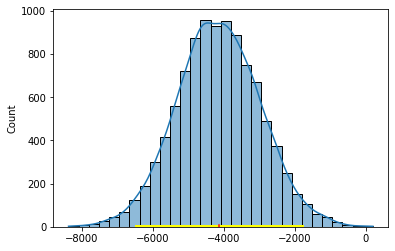

In [24]:
plt.plot([LL, UU], [0, 0], color="yellow", lw=5)
plt.plot([mean_difference, mean_difference], [0, 10], color="red")
sns.histplot(data=bootstrap_statistics, bins=30, kde=True)

In [25]:
print(f"""
The estimated value by resampling with replacement is ${mean_difference:,.2f}.
With a 95% bootstrap confidence interval of [${LL:,.2f}, {UU:,.2f}].
""")


The estimated value by resampling with replacement is $-4,146.75.
With a 95% bootstrap confidence interval of [$-6,439.44, -1,814.52].

